---
title: "Intro to EDA"
date: last-modified
toc: true
format:
  html: default
  ipynb: default
---


Exploratory data analysis, or EDA, is a standard practice prior to any data manipulation and analysis.

Recall that data engineering is primarily about data preparation to *serve* smooth and effective data analysis.  Exploratory data analysis generally refers to the step of understanding the data:  

- **summarizing characteristics of raw data**
- **visualizing data (single and multiple variables)**
- identifying missing data
- identifying outliers

This document primarily deals with the first two items.  

## Goals
In the **exploratory** phase, these are for people behind the scenes to see.  

The main goals here are:

- capture main message
- (relatively) quick exploration across many summaries (including plots)
- *not* intended for a client or presentation

What does this translate to, technically?

- each summary should have meaningful information
- **label** your plots

## Data summary
As a starting point, simply looking at the data is worth the while.  Some common questions to consider are the following:  


1. General dataset info: size, dtypes  
2. Missing values?  
3. Duplicate data?  
4. Continuous variables  
5. Categorical variables  
6. Bivariate relationships  
7. Potential data quality issues, e.g., inconsistency, special NA characters

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

|![sns](../img/sns.jpg)|
|:---:|
|[The origin of sns.](https://seaborn.pydata.org/faq.html#why-is-seaborn-imported-as-sns)|

## Earthquake dataset

[Source Link](https://open.canada.ca/data/en/dataset/2c3672b6-4c17-4ff5-9861-29e2dd6d03b3/resource/9cfea46f-561a-440f-9d17-fed3557fc7b5)

In [26]:
# load and save a copy of the earthquake dataset
earthquake = pd.read_csv('https://raw.githubusercontent.com/mosesyhc/de300-2026wi/refs/heads/main/datasets/Canadian-Earthquakes-2010-2019.csv')

In [27]:
# take a glimpse of the data
earthquake.head()
earthquake.tail() # or check the end

,magnitude_codelist,magnitude,magnitude_type,date,place,depth,latitude,longitude,OBJECTID,longitude_geom,latitude_geom
44556,<2,1.8,ML,2019-12-31T18:37:24+0000,"31 km SE of Ashcroft, BC",14.0,50.487999,-121.035004,44557,-121.035415,50.487806
44557,2,2.4,MN,2019-12-31T22:18:53+0000,"Blast, Laronde Mine, QC",0.0,48.250000,-78.448997,44558,-78.449004,48.250409
44558,2,2.0,ML,2019-12-31T23:11:07+0000,"29 km SE of Ashcroft, BC",10.5,50.526001,-121.005997,44559,-121.006115,50.526206
44559,<2,1.9,MN,2019-12-31T23:53:23+0000,"6 km N from Cornwall, ON",18.0,45.083000,-74.718002,44560,-74.718302,45.083409
44560,<2,1.3,MN,2019-12-31T23:54:02+0000,"CHARLEVOIX SEISMIC ZONE, QC.",3.8,47.492001,-70.412003,44561,-70.412401,47.491910


In [28]:
# view a summary of the full data
earthquake.info()

    # to check data type and missing data
    # strings are coded as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44561 entries, 0 to 44560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_codelist  44561 non-null  object 
 1   magnitude           44561 non-null  float64
 2   magnitude_type      44462 non-null  object 
 3   date                44561 non-null  object 
 4   place               44561 non-null  object 
 5   depth               44561 non-null  float64
 6   latitude            44561 non-null  float64
 7   longitude           44561 non-null  float64
 8   OBJECTID            44561 non-null  int64  
 9   longitude_geom      44561 non-null  float64
 10  latitude_geom       44561 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 3.7+ MB


In [29]:
# checks for duplicates (also ask if duplicates make sense)
earthquake.duplicated().any()

False

In [30]:
# duplicates
earthquake[earthquake.duplicated()] # to subset and extract out the duplicates


,magnitude_codelist,magnitude,magnitude_type,date,place,depth,latitude,longitude,OBJECTID,longitude_geom,latitude_geom


In [31]:
# a quick numerical summary 
earthquake.describe()

,magnitude,depth,latitude,longitude,OBJECTID,longitude_geom,latitude_geom
count,44561.000000,44561.000000,44561.000000,44561.000000,44561.000000,44561.000000,44561.000000
mean,2.134070,12.852194,53.351863,-118.953322,22281.000000,-118.953299,53.351830
std,0.828096,9.963145,6.214464,23.696484,12863.797009,23.696493,6.214465
min,-1.400000,-0.500000,40.808998,-148.811005,1.000000,-148.810526,40.808509
25%,1.600000,5.000000,49.169998,-132.427994,11141.000000,-132.427618,49.170009
50%,2.100000,10.000000,52.137001,-129.671997,22281.000000,-129.672016,52.136507
75%,2.700000,18.000000,56.514999,-121.947998,33421.000000,-121.948318,56.515206
max,7.700000,214.000000,82.608002,-39.320000,44561.000000,-39.319968,82.607812


In [32]:
# checks for possible statistical assumption(s)
import scipy.stats as sps

In [33]:
# extract only numeric variables
earthquake_numeric = earthquake.select_dtypes("number")

In [34]:
earthquake_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44561 entries, 0 to 44560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   magnitude       44561 non-null  float64
 1   depth           44561 non-null  float64
 2   latitude        44561 non-null  float64
 3   longitude       44561 non-null  float64
 4   OBJECTID        44561 non-null  int64  
 5   longitude_geom  44561 non-null  float64
 6   latitude_geom   44561 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.4 MB


In [35]:
# for example, normality test
sps.normaltest(earthquake_numeric)

# null hypothesis: data is normally distributed
# alternative hypothesis: data is not normally distributed

# in this case, we reject the null hypothesis because it is less than 0.05

# when you have a lot of data (here, we have 44,000 rows), the only way we don't reject a normality test is that it actually is following one normal distribution

NormaltestResult(statistic=array([ 1597.66581247, 15302.56967363,  9387.86913782,  8551.48250207,
       39401.07756051,  8551.48413702,  9387.85609679]), pvalue=array([0., 0., 0., 0., 0., 0., 0.]))

In [36]:
# for example, another normality test
sps.shapiro(earthquake_numeric.iloc[:, 1]) # iloc locates the row or column by its numerical index

# p-value is near 0, so we reject the null hypothesis


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44561.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9052753775261458, pvalue=4.79696535554529e-93)

In [37]:
# pairwise correlation
earthquake_numeric.corr()

# this only tells us if there is a linear relationship
# correlation is not dependent on scaling


,magnitude,depth,latitude,longitude,OBJECTID,longitude_geom,latitude_geom
magnitude,1.000000,-0.127958,0.196699,-0.110731,-0.006523,-0.110731,0.196699
depth,-0.127958,1.000000,-0.107744,-0.005796,-0.103983,-0.005796,-0.107744
latitude,0.196699,-0.107744,1.000000,-0.266265,-0.000391,-0.266265,1.000000
longitude,-0.110731,-0.005796,-0.266265,1.000000,0.049094,1.000000,-0.266265
OBJECTID,-0.006523,-0.103983,-0.000391,0.049094,1.000000,0.049093,-0.000390
longitude_geom,-0.110731,-0.005796,-0.266265,1.000000,0.049093,1.000000,-0.266265
latitude_geom,0.196699,-0.107744,1.000000,-0.266265,-0.000390,-0.266265,1.000000


## Data visualization

In [38]:
sns.set(context='talk', style='ticks')  # simply for aesthetics
sns.set_palette('magma')
%matplotlib inline 

#earthquake = earthquake.sample(n=500)  # (if too slow) for illustration purposes


<Axes: ylabel='Frequency'>

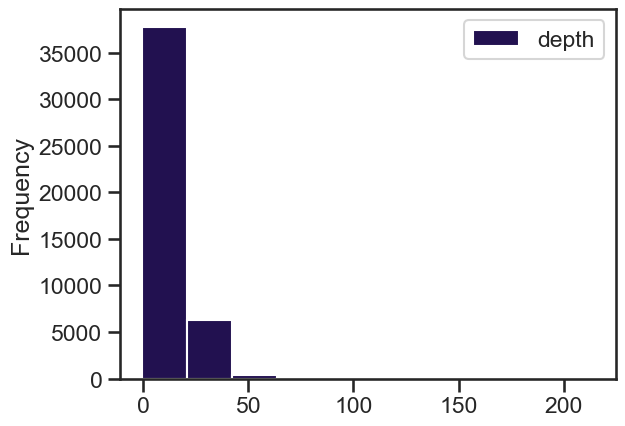

In [39]:
# histogram for continuous variables using pandas built-in plots 

earthquake.plot.hist(column='depth')

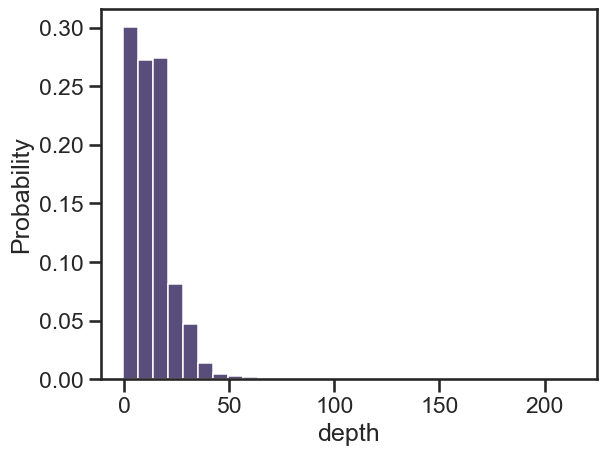

In [51]:
# relative frequency? ...

sns.histplot(x='depth', data=earthquake, stat='probability', bins=30)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44561 entries, 0 to 44560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_codelist  44561 non-null  object 
 1   magnitude           44561 non-null  float64
 2   magnitude_type      44462 non-null  object 
 3   date                44561 non-null  object 
 4   place               44561 non-null  object 
 5   depth               44561 non-null  float64
 6   latitude            44561 non-null  float64
 7   longitude           44561 non-null  float64
 8   OBJECTID            44561 non-null  int64  
 9   longitude_geom      44561 non-null  float64
 10  latitude_geom       44561 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 3.7+ MB


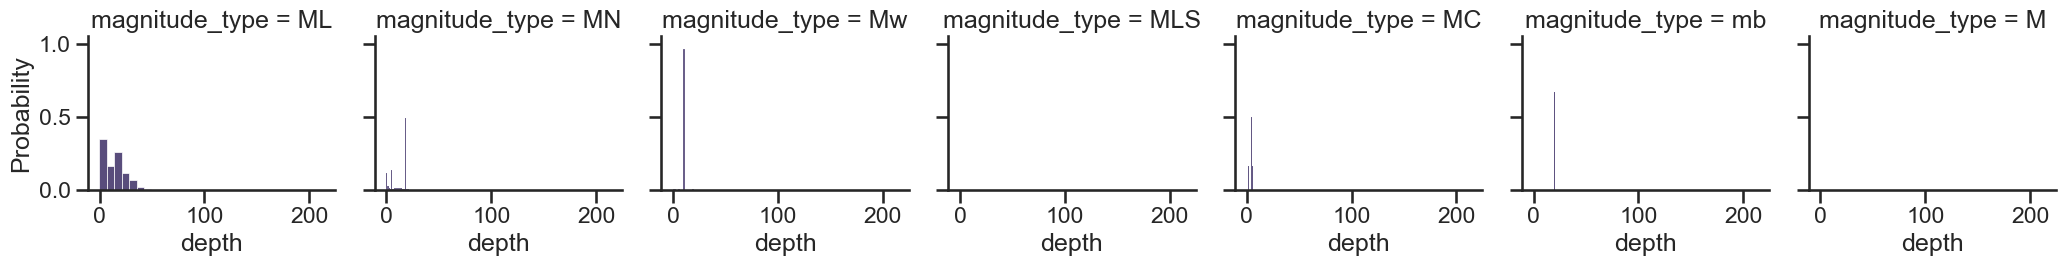

In [54]:
# histogram of masses by group

earthquake.info()
g = sns.FacetGrid(earthquake, col='magnitude_type') # set up a grid to separate by groups

g.map(sns.histplot, 'depth', stat='probability', bins=30)

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


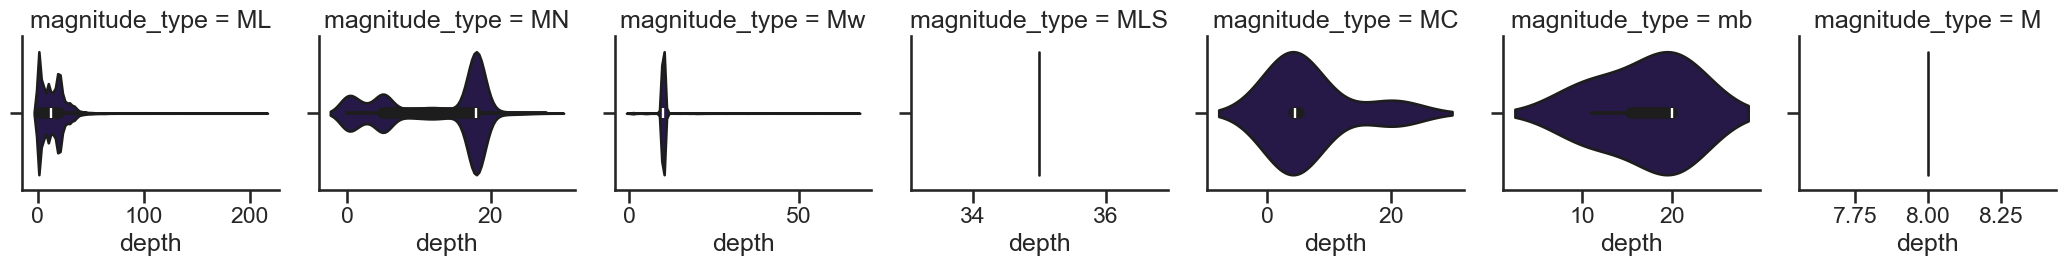

In [59]:
# other types of plots

g=sns.FacetGrid(earthquake, col='magnitude_type', sharex=False)
g.map(sns.violinplot, 'depth')
plt.show()

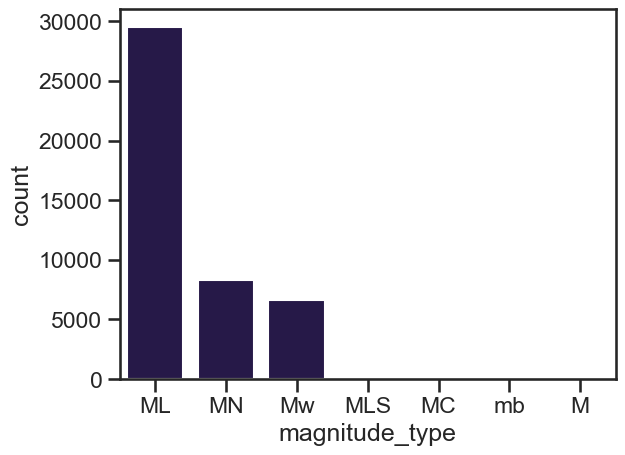

In [61]:
# counts for categorical variables
sns.countplot(x='magnitude_type', data=earthquake)
plt.show()

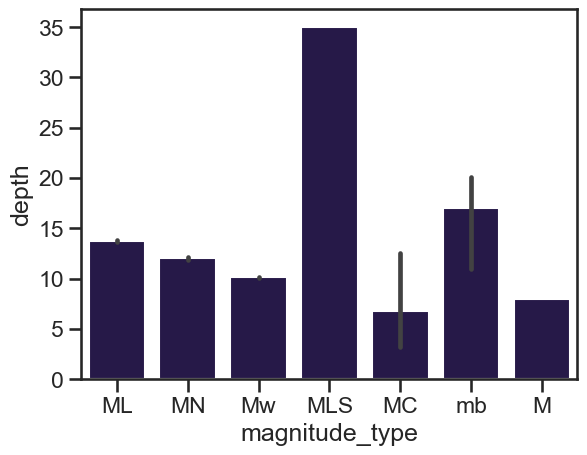

In [63]:
# barplots by group

sns.barplot(x='magnitude_type', y='depth', data=earthquake)
plt.show()

# this actually plots depth not just count on the y-axis
# plots mean


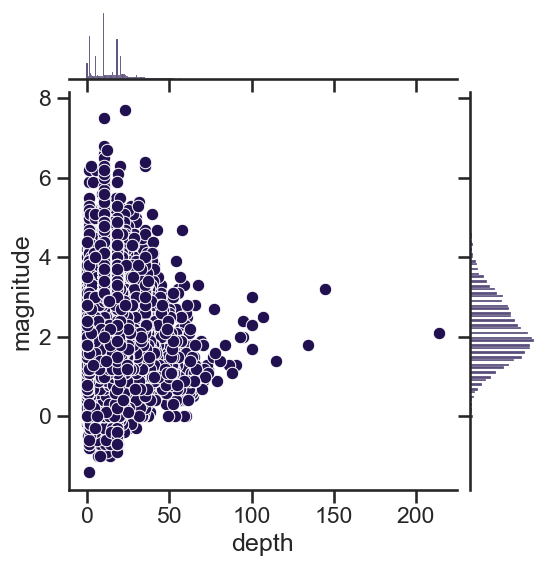

In [64]:
# bivariate plots

sns.jointplot(x='depth', y='magnitude', data=earthquake)

In [66]:
# bivariate plots (log-log)



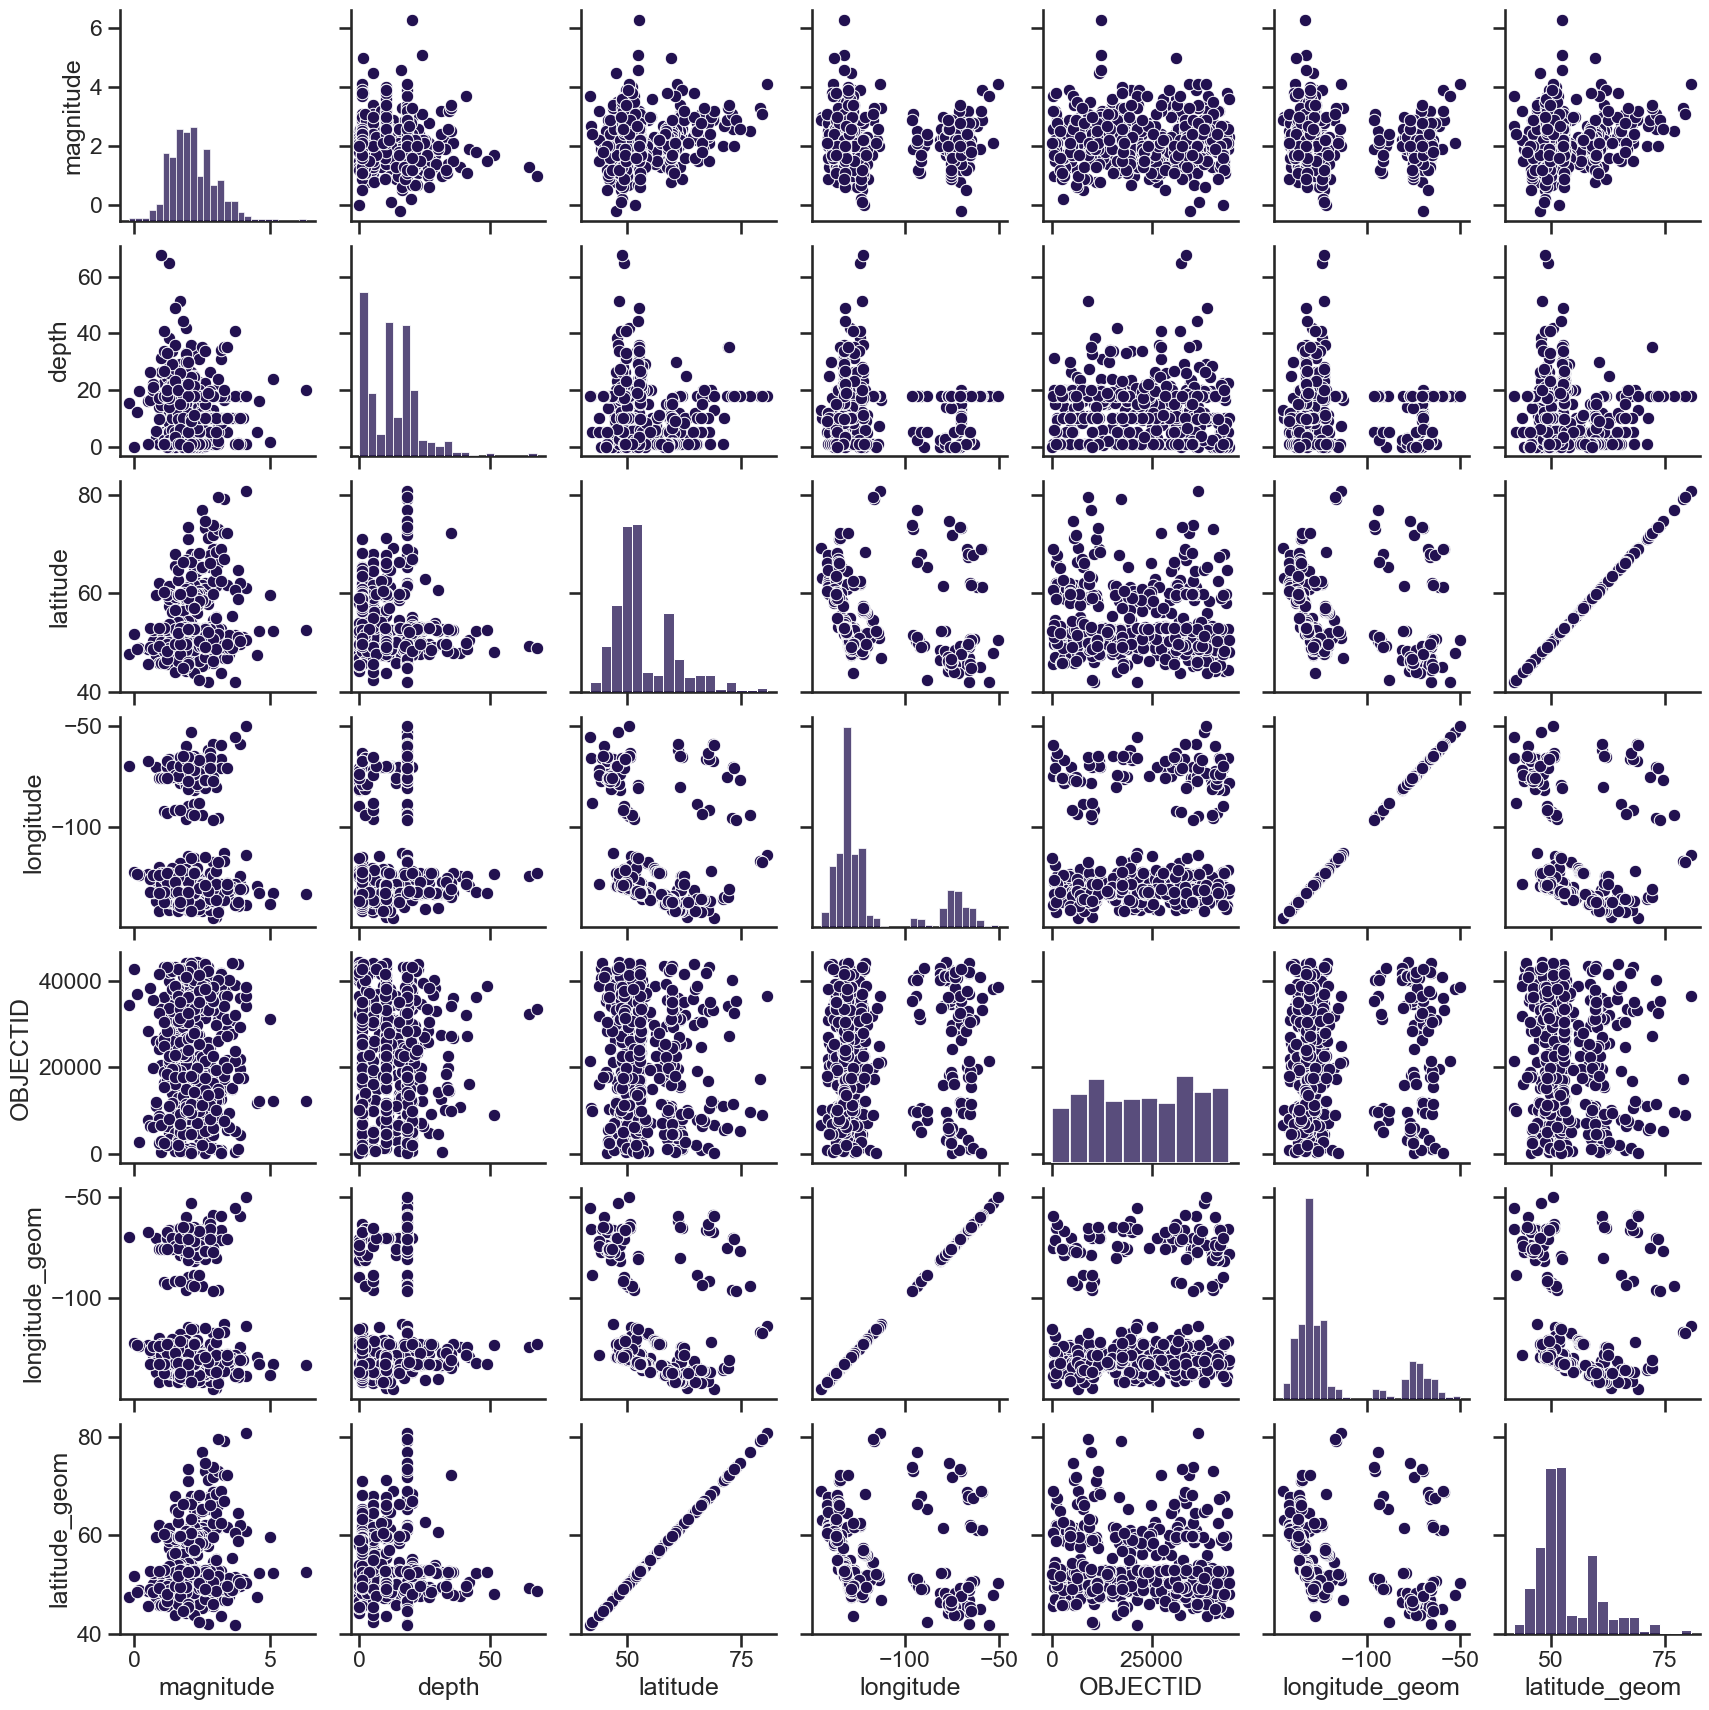

In [67]:
# pairwise plots  (time-consuming)

g = sns.pairplot(earthquake.sample(500))

# as a first pass, a good subsample should be good (and fast)


In [48]:
# another pairwise plot by group

## In-class activity
Refer to the following figure, choose two subfigures to reproduce with the earthquake dataset.

![](../datasets/earthquake_analysis-2010-2019.png)

# https://seaborn.pydata.org/examples/index.html

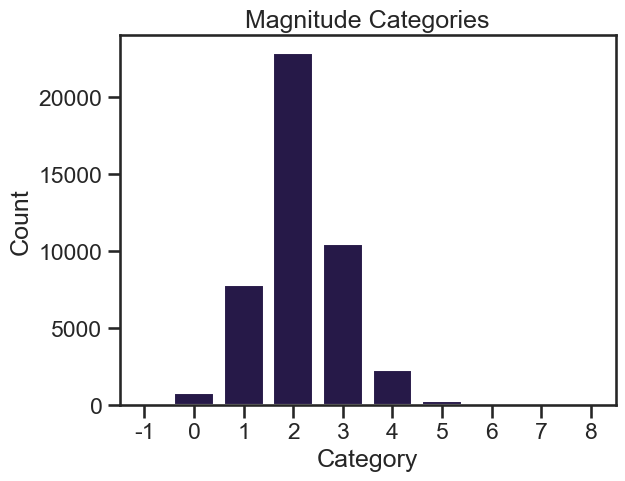

In [73]:
# magnitude categories


# round magnitude to integers



# sort by <2, integer, and >5

earthquake['magnitude_category'] = earthquake['magnitude'].round().astype('int').astype('category')




sns.countplot(x='magnitude_category', data=earthquake)
plt.title('Magnitude Categories')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()



Text(0, 0.5, 'Count')

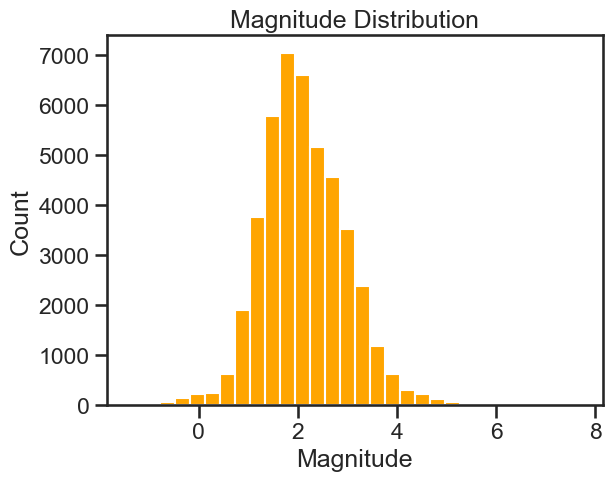

In [76]:
# magnitude distribution

earthquake['magnitude'].plot.hist(bins=30, color='orange')
plt.title('Magnitude Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Count')



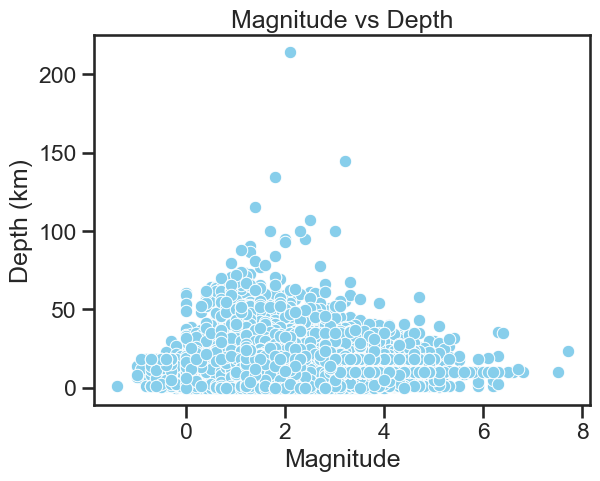

In [92]:
# magnitude vs depth

sns.scatterplot(data=earthquake, x='magnitude', y='depth', color='skyblue')
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.title('Magnitude vs Depth')
plt.show()

In [93]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44561 entries, 0 to 44560
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   magnitude_codelist  44561 non-null  object  
 1   magnitude           44561 non-null  float64 
 2   magnitude_type      44462 non-null  object  
 3   date                44561 non-null  object  
 4   place               44561 non-null  object  
 5   depth               44561 non-null  float64 
 6   latitude            44561 non-null  float64 
 7   longitude           44561 non-null  float64 
 8   OBJECTID            44561 non-null  int64   
 9   longitude_geom      44561 non-null  float64 
 10  latitude_geom       44561 non-null  float64 
 11  magnitude_category  44561 non-null  category
dtypes: category(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


<Axes: >

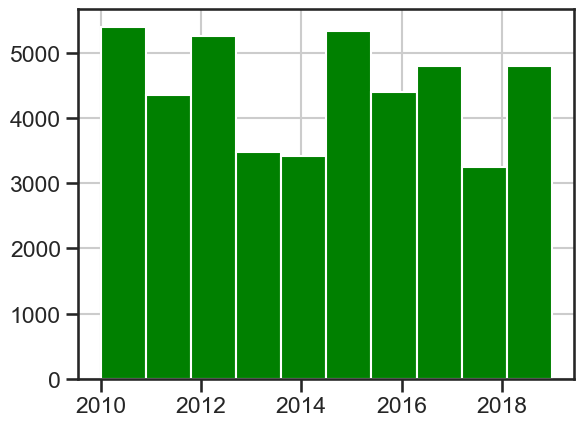

In [101]:
# earthquakes per year

earthquake['date'] = pd.to_datetime(earthquake['date'])
earthquake['year'] = earthquake['date'].dt.year


earthquake['year'].hist

## (In case you need this) Jupyter notebook setup

Visit https://docs.jupyter.org/en/latest/install/notebook-classic.html for some guidance to set up jupyter notebook.


---

*Note:* These notes are adapted from a blog post on [Tom's Blog](https://tomaugspurger.net/posts/modern-6-visualization/).
